<a href="https://colab.research.google.com/github/pallavi-sutar097/customer_segmentation/blob/main/ds_project_2_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # arrays
import pandas as pd # loading data in data frames
import matplotlib.pyplot as plt #data visuallisation library
import seaborn as sns
from sklearn.cluster import KMeans # algorithm

Data collection and analysis

In [ ]:
#loading the data from csv file to a pandas dataframe
customer_data = pd.read_csv('/content/sample_data/Mall_Customers (1).csv')

In [ ]:
#first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#finding the no of rows and cols
customer_data.shape

(200, 5)

In [ ]:
#getting some info abt the data set
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#check missing vals
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
#choose customer income and spending score col
X = customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

choosing the number of clusters using WCSS (withing clusters square values).
the wcss value should be very less ie the distance btw the centroid and the data points should be less

In [ ]:
#choose the number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X) #fit the data to kmeans

  wcss.append(kmeans.inertia_)

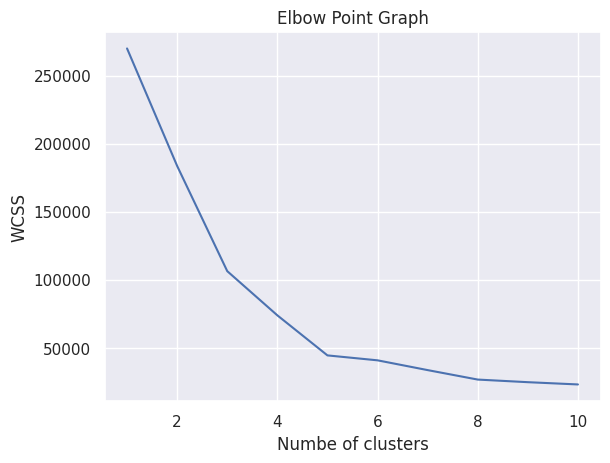

In [ ]:
#plot elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Numbe of clusters')
plt.ylabel('WCSS')
plt.show()


since there are 2 elbow points that is at 3 and 5, consider the point after which there is no significant drop in any range

thus the optimal number of clusters is 5
now,

Training the kmeans clustering model

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

#return a label on each data point based on clusters
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


we have labels from 0 to 4 since we have mentioned 5 clusters

now visualise the clusters using a graph
X axis is anual income
Y axis is spending score

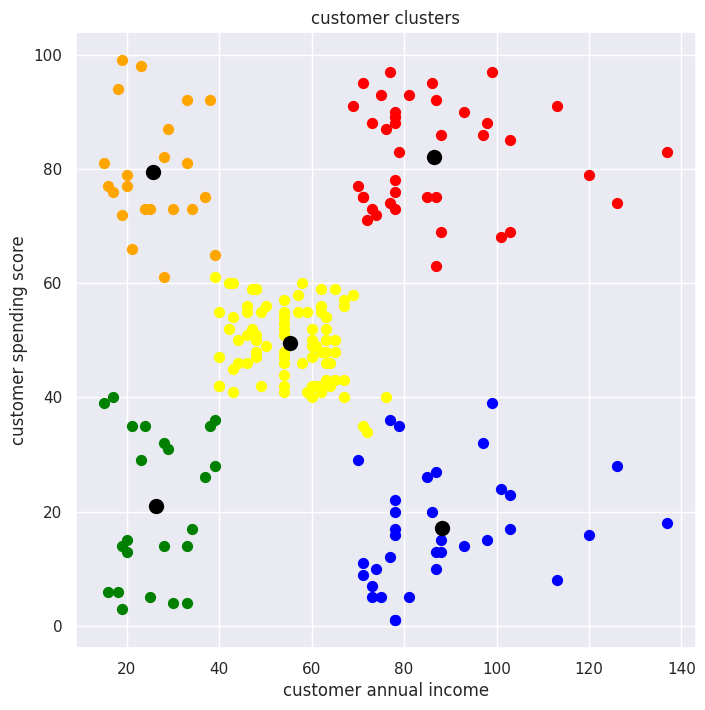

In [ ]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1], s =50, c='yellow', label='cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s =50, c='red', label='cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s =50, c='blue', label='cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s =50, c='green', label='cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s =50, c='orange', label='cluster 5')

#plot the centroids, s is the size of the dots
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('customer clusters')
plt.xlabel('customer annual income')
plt.ylabel('customer spending score')
plt.show()